In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Mcdonald.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [16]:
print('Number of rows are {} and number of columns are {}.'.format(df.shape[0],df.shape[1]))

Number of rows are 260 and number of columns are 24.


In [8]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

# 1. Plot graphically which food categories have the highest and lowest varieties.


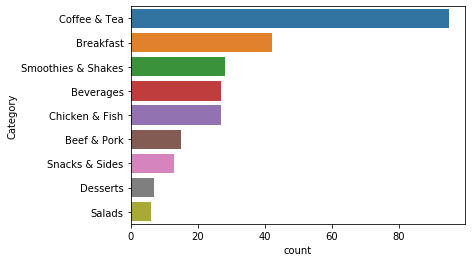

In [20]:
sns.countplot(y = df['Category'],order=df['Category'].value_counts().index)

In [23]:
df.iloc[0]

Category                              Breakfast
Item                               Egg McMuffin
Serving Size                     4.8 oz (136 g)
Calories                                    300
Calories from Fat                           120
Total Fat                                    13
Total Fat (% Daily Value)                    20
Saturated Fat                                 5
Saturated Fat (% Daily Value)                25
Trans Fat                                     0
Cholesterol                                 260
Cholesterol (% Daily Value)                  87
Sodium                                      750
Sodium (% Daily Value)                       31
Carbohydrates                                31
Carbohydrates (% Daily Value)                10
Dietary Fiber                                 4
Dietary Fiber (% Daily Value)                17
Sugars                                        3
Protein                                      17
Vitamin A (% Daily Value)               

# 2. Which all variables have an outlier?



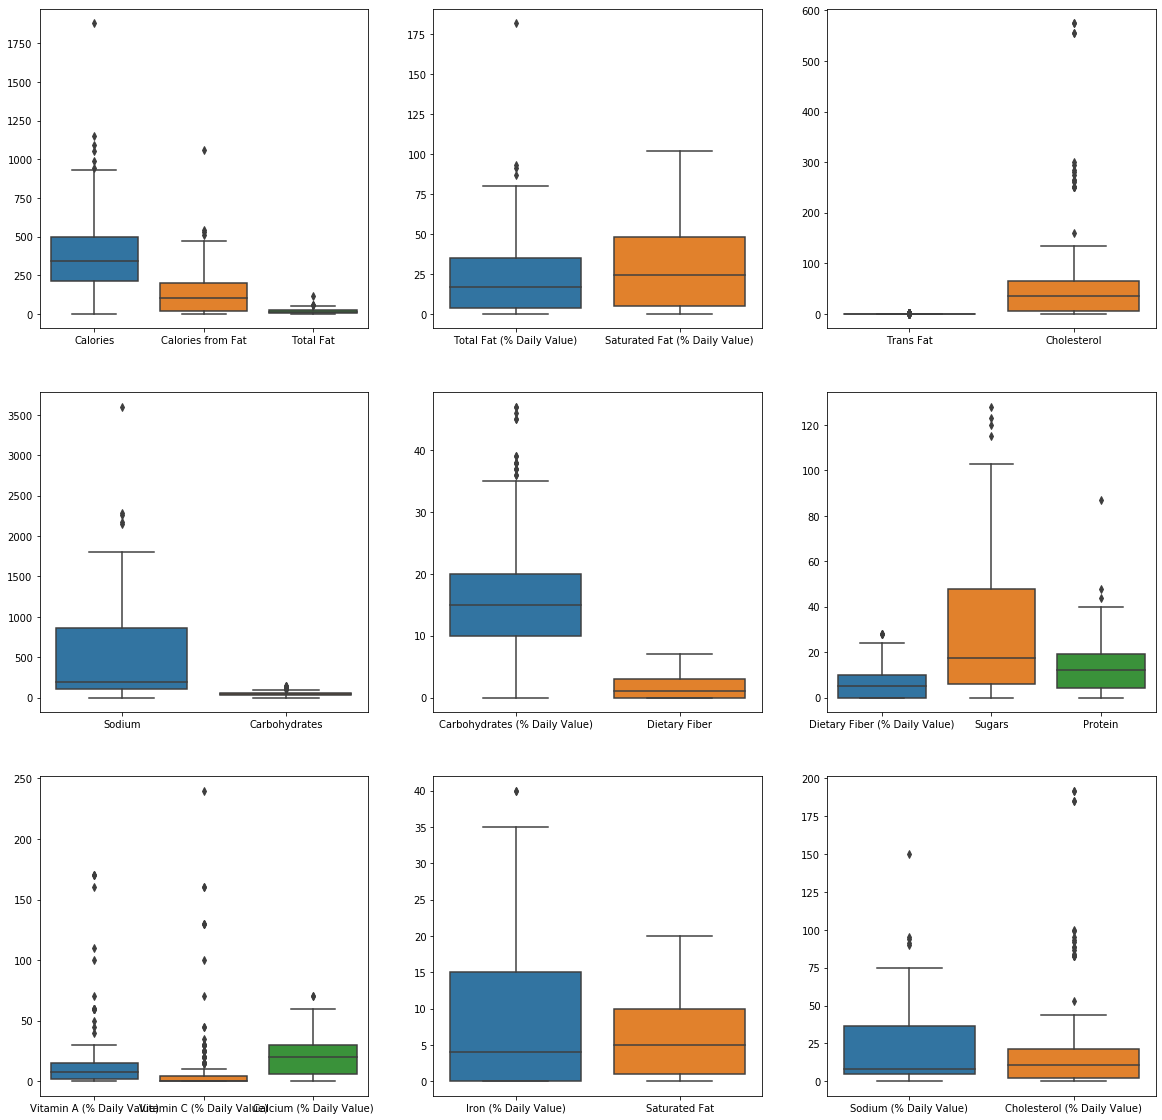

In [44]:
fig ,axes = plt.subplots(nrows = 3,ncols = 3)
fig.set_size_inches(20,20)
sns.boxplot(data = df[['Calories','Calories from Fat','Total Fat']],orient= 'v',ax = axes[0][0])
sns.boxplot(data= df[['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)']],orient='v',ax = axes [0][1])
sns.boxplot(data = df[['Trans Fat','Cholesterol']],orient='v',ax = axes[0][2])
sns.boxplot(data = df[['Sodium','Carbohydrates']],orient='v',ax = axes[1][0])
sns.boxplot(data = df[['Carbohydrates (% Daily Value)','Dietary Fiber']],orient = 'v',ax = axes[1][1])
sns.boxplot(data = df[['Dietary Fiber (% Daily Value)','Sugars','Protein']],orient = 'v',ax = axes[1][2])
sns.boxplot(data = df[['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)']],orient ='v',ax = axes[2][0])
sns.boxplot(data = df[['Iron (% Daily Value)','Saturated Fat']],orient = 'v',ax = axes [2][1])
sns.boxplot(data = df[['Sodium (% Daily Value)','Cholesterol (% Daily Value)']],orient = 'v',ax = axes[2][2])
plt.show()

# 3. Which variables have the highest correlation? Plot them and find out the value?



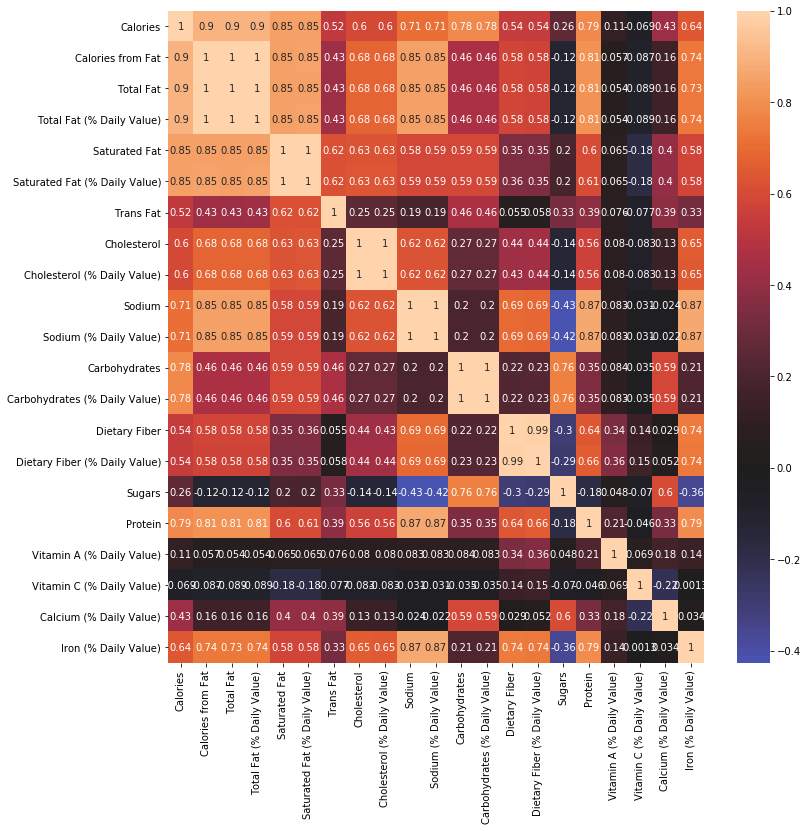

In [49]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot =True,center = 0)
plt.show()

# 4. Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?


In [52]:
df.groupby('Category').sum()['Cholesterol (% Daily Value)'].sort_values(ascending = False)

Category
Breakfast             2140
Coffee & Tea           891
Chicken & Fish         681
Beef & Pork            434
Smoothies & Shakes     412
Salads                 104
Snacks & Sides          81
Desserts                34
Beverages                5
Name: Cholesterol (% Daily Value), dtype: int64

# 5. Which item contributes maximum to the Sodium intake?




In [57]:
df.groupby('Item').sum()['Sodium'].sort_values(ascending = False).head(5)

Item
Chicken McNuggets (40 piece)                                    3600
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)      2290
Big Breakfast with Hotcakes (Large Biscuit)                     2260
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)    2170
Big Breakfast with Hotcakes (Regular Biscuit)                   2150
Name: Sodium, dtype: int64

# 6. Which 4 food items contain the most amount of Saturated Fat?



In [59]:
df.groupby('Item').sum()['Saturated Fat'].sort_values(ascending = False).head(4)

Item
Big Breakfast with Hotcakes (Large Biscuit)    20.0
Chicken McNuggets (40 piece)                   20.0
McFlurry with M&M’s Candies (Medium)           20.0
Frappé Chocolate Chip (Large)                  20.0
Name: Saturated Fat, dtype: float64